Image Data Analysis with RNN (Recurrent Neural Networks)
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5765 - loss: 1.2642
Epoch 1: accuracy improved from -inf to 0.71620, saving model to mnist_model.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 11s 15ms/step - accuracy: 0.5774 - loss: 1.2616 - val_accuracy: 0.8513 - val_loss: 0.4826
Epoch 2/10
468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8576 - loss: 0.4556
Epoch 2: accuracy improved from 0.71620 to 0.87455, saving model to mnist_model.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.8577 - loss: 0.4555 - val_accuracy: 0.8927 - val_loss: 0.3622
Epoch 3/10
465/469 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9015 - loss: 0.3329
Epoch 3: accuracy improved from 0.87455 to 0.90793, saving model to mnist_model.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.9016 - loss: 0.3327 - val_accuracy: 0.9168 - val_loss: 0.2838
Epoch 4/10
468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9188 - loss: 0.2749
Epoch 4: accuracy improved from 0.90793 to

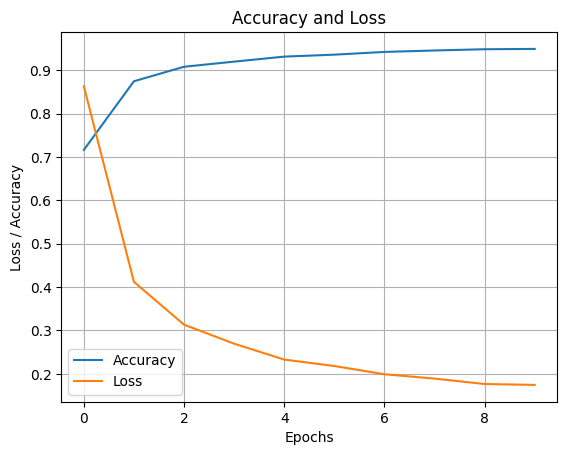

In [1]:
from keras import Sequential
from keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import mnist
from keras.layers import Dense, SimpleRNN, LSTM, GRU, Activation

print("Image Data Analysis with RNN (Recurrent Neural Networks)")

(xtrain, ytrain), (xtest,ytest) = mnist.load_data()

xtrain1 = xtrain
xtest1 = xtest

xtrain = xtrain/255.0
xtest = xtest/255.0
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

model = Sequential()
model.add(SimpleRNN(50, input_shape=(28,28)))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpoint=ModelCheckpoint('mnist_model.keras', verbose=1, monitor='accuracy', save_best_only=True)
history = model.fit(xtrain, ytrain, batch_size=128, epochs=10, verbose=1, validation_data=(xtest, ytest), callbacks=[checkpoint] )


scores = model.evaluate(xtest, ytest)
print("Loss")
print(scores[0])
print("Accuracy")
print(scores[1])


his = pd.DataFrame(history.history)
fig1 = plt.figure()
plt.plot(his['accuracy'], label="Accuracy")
plt.plot(his['loss'], label="Loss")
plt.legend()
plt.title("Accuracy and Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss / Accuracy")
plt.grid()
plt.show(fig1)

Enter a image sample id (0-9999):3


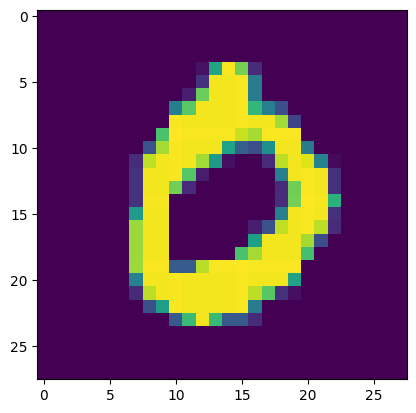

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
[[9.9593604e-01 6.3325797e-06 1.4777681e-03 2.8904498e-05 5.6467863e-04
  5.3238525e-04 6.8938523e-04 2.5867127e-04 4.8773765e-04 1.8017505e-05]]

The number is given below : 
[0]


In [3]:
from keras.models import load_model
# Load the model using the correct filename
model_pred_rnn = load_model("mnist_model.keras")

(xtrain, ytrain), (xtest,ytest) = mnist.load_data()

n1 = int(input("Enter a image sample id (0-9999):"))

# display the image from the mnnist database below
fig1=plt.figure()
plt.imshow(xtest1[n1])
plt.show(fig1)

# Input
sample = xtest[n1].reshape((1, 28, 28)) / 255.0

target_sp = model_pred_rnn.predict(sample)
print(target_sp)
out = np.argmax(target_sp, axis=1)
print("\r\nThe number is given below : ")
print(out)

Image Data Analysis with RNN (Recurrent Neural Networks)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.5515 - loss: 1.3250
Epoch 1: accuracy improved from -inf to 0.75283, saving model to mnist_lstm_model.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 17s 30ms/step - accuracy: 0.5527 - loss: 1.3215 - val_accuracy: 0.9193 - val_loss: 0.2713
Epoch 2/10
468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9242 - loss: 0.2558
Epoch 2: accuracy improved from 0.75283 to 0.93292, saving model to mnist_lstm_model.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 27ms/step - accuracy: 0.9243 - loss: 0.2557 - val_accuracy: 0.9455 - val_loss: 0.1764
Epoch 3/10
467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9501 - loss: 0.1704
Epoch 3: accuracy improved from 0.93292 to 0.95388, saving model to mnist_lstm_model.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 13s 28ms/step - accuracy: 0.9501 - loss: 0.1703 - val_accuracy: 0.9580 - val_loss: 0.1396
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - accuracy: 0.9604 - loss: 0.1335
Epoch 4: accuracy improve

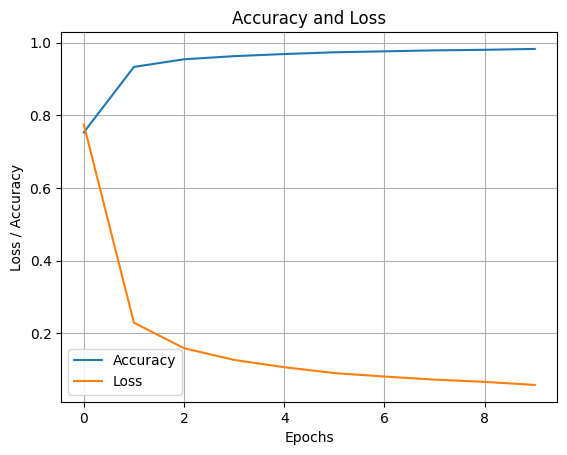

In [4]:
from keras import Sequential
from keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import mnist
from keras.layers import Dense, SimpleRNN, LSTM, GRU, Activation

print("Image Data Analysis with RNN (Recurrent Neural Networks)")

(xtrain, ytrain), (xtest,ytest) = mnist.load_data()

xtrain1 = xtrain
xtest1 = xtest

xtrain = xtrain/255.0
xtest = xtest/255.0
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

model = Sequential()
model.add(LSTM(50, input_shape=(28,28)))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpoint=ModelCheckpoint('mnist_lstm_model.keras', verbose=1, monitor='accuracy', save_best_only=True)
history = model.fit(xtrain, ytrain, batch_size=128, epochs=10, verbose=1, validation_data=(xtest, ytest), callbacks=[checkpoint] )


scores = model.evaluate(xtest, ytest)
print("Loss")
print(scores[0])
print("Accuracy")
print(scores[1])


his = pd.DataFrame(history.history)
fig1 = plt.figure()
plt.plot(his['accuracy'], label="Accuracy")
plt.plot(his['loss'], label="Loss")
plt.legend()
plt.title("Accuracy and Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss / Accuracy")
plt.grid()
plt.show(fig1)

Enter a image sample id (0-9999):5


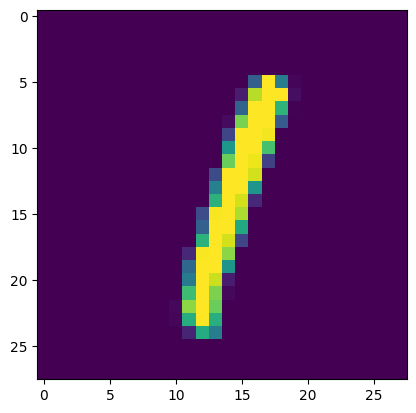

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 225ms/step
[[9.87554699e-07 9.99743879e-01 2.50098328e-05 5.23783274e-06
  7.91240745e-06 2.39192541e-05 1.92113421e-05 4.66743695e-05
  1.18466225e-04 8.60556247e-06]]

The number is given below : 
[1]


In [5]:
from keras.models import load_model
# Load the model using the correct filename
model_pred_rnn = load_model("mnist_lstm_model.keras")

(xtrain, ytrain), (xtest,ytest) = mnist.load_data()

n1 = int(input("Enter a image sample id (0-9999):"))

# display the image from the mnnist database below
fig1=plt.figure()
plt.imshow(xtest1[n1])
plt.show(fig1)

# Input
sample = xtest[n1].reshape((1, 28, 28)) / 255.0

target_sp = model_pred_rnn.predict(sample)
print(target_sp)
out = np.argmax(target_sp, axis=1)
print("\r\nThe number is given below : ")
print(out)

Image Data Analysis with RNN (Recurrent Neural Networks)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.4897 - loss: 1.4611
Epoch 1: accuracy improved from -inf to 0.69297, saving model to mnist_gru_model.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 35ms/step - accuracy: 0.4901 - loss: 1.4600 - val_accuracy: 0.8913 - val_loss: 0.3735
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9041 - loss: 0.3223
Epoch 2: accuracy improved from 0.69297 to 0.91810, saving model to mnist_gru_model.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 34ms/step - accuracy: 0.9041 - loss: 0.3222 - val_accuracy: 0.9394 - val_loss: 0.2145
Epoch 3/10
467/469 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.9438 - loss: 0.1978
Epoch 3: accuracy improved from 0.91810 to 0.94652, saving model to mnist_gru_model.keras
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.9438 - loss: 0.1977 - val_accuracy: 0.9514 - val_loss: 0.1659
Epoch 4/10
468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.9559 - loss: 0.1522
Epoch 4: accuracy improved f

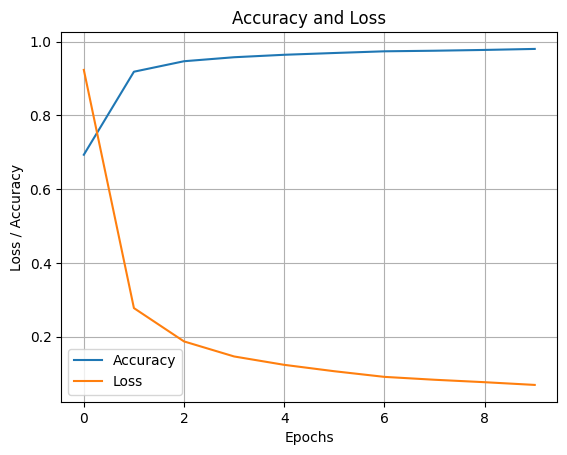

In [6]:
from keras import Sequential
from keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from keras.datasets import mnist
from keras.layers import Dense, SimpleRNN, LSTM, GRU, Activation

print("Image Data Analysis with RNN (Recurrent Neural Networks)")

(xtrain, ytrain), (xtest,ytest) = mnist.load_data()

xtrain1 = xtrain
xtest1 = xtest

xtrain = xtrain/255.0
xtest = xtest/255.0
ytrain = to_categorical(ytrain)
ytest = to_categorical(ytest)

model = Sequential()
model.add(GRU(50, input_shape=(28,28)))
model.add(Dense(10))
model.add(Activation('softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpoint=ModelCheckpoint('mnist_gru_model.keras', verbose=1, monitor='accuracy', save_best_only=True)
history = model.fit(xtrain, ytrain, batch_size=128, epochs=10, verbose=1, validation_data=(xtest, ytest), callbacks=[checkpoint] )


scores = model.evaluate(xtest, ytest)
print("Loss")
print(scores[0])
print("Accuracy")
print(scores[1])


his = pd.DataFrame(history.history)
fig1 = plt.figure()
plt.plot(his['accuracy'], label="Accuracy")
plt.plot(his['loss'], label="Loss")
plt.legend()
plt.title("Accuracy and Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss / Accuracy")
plt.grid()
plt.show(fig1)

Enter a image sample id (0-9999):7


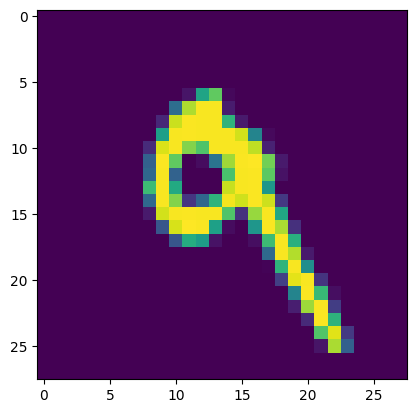

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 300ms/step
[[5.2111850e-06 1.1703250e-05 5.6750898e-05 1.0522779e-02 4.1563821e-04
  1.2313995e-03 2.8303691e-06 2.0424546e-04 1.4846418e-03 9.8606479e-01]]

The number is given below : 
[9]


In [7]:
from keras.models import load_model
# Load the model using the correct filename
model_pred_rnn = load_model("mnist_gru_model.keras")

(xtrain, ytrain), (xtest,ytest) = mnist.load_data()

n1 = int(input("Enter a image sample id (0-9999):"))

# display the image from the mnnist database below
fig1=plt.figure()
plt.imshow(xtest1[n1])
plt.show(fig1)

# Input
sample = xtest[n1].reshape((1, 28, 28)) / 255.0

target_sp = model_pred_rnn.predict(sample)
print(target_sp)
out = np.argmax(target_sp, axis=1)
print("\r\nThe number is given below : ")
print(out)